# Urban Air Pollution Challenge

## Rachel Kwon and Winston Tang 

In [787]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 
import datetime

import warnings
warnings.simplefilter("ignore")

# Data Preprocessing

- Examining dataset
- Identifying and replacing missing values 
- Identifying outliers
- Dropping columns 
- Feature engineering/selection 

In [788]:
#loading dataset 
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [789]:
train.head(3)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.0,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.6,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.4,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [790]:
test.head(3)

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [791]:
print(train.shape)
print(test.shape)

(30557, 82)
(16136, 77)


In [792]:
train.isna().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

**Considering there's ~30k rows in our dataset but CH4 data is missing nearly ~25k rows of data it may be better to not use CH4 in further analysis** 

In [793]:
train = train.fillna(train.mean())

In [794]:
train.isna().sum()

Place_ID X Date                 0
Date                            0
Place_ID                        0
target                          0
target_min                      0
                               ..
L3_CH4_aerosol_optical_depth    0
L3_CH4_sensor_azimuth_angle     0
L3_CH4_sensor_zenith_angle      0
L3_CH4_solar_azimuth_angle      0
L3_CH4_solar_zenith_angle       0
Length: 82, dtype: int64

In [795]:
train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630


In [796]:
train["Date"]=pd.to_datetime(train["Date"])

In [797]:
train['month'] = train['Date'].dt.month
train['week'] = train['Date'].dt.week
train['day'] = train['Date'].dt.day

In [798]:
train = train.drop(["Place_ID", "Place_ID X Date", "target_min", "target_max", "target_variance", "target_count"], axis=1)

In [799]:
train.head(2)

,Date,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,...,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle,month,week,day
0,2020-01-02,38.0,11.0,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,...,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118,1,1,2
1,2020-01-03,39.0,14.6,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,...,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652,1,1,3


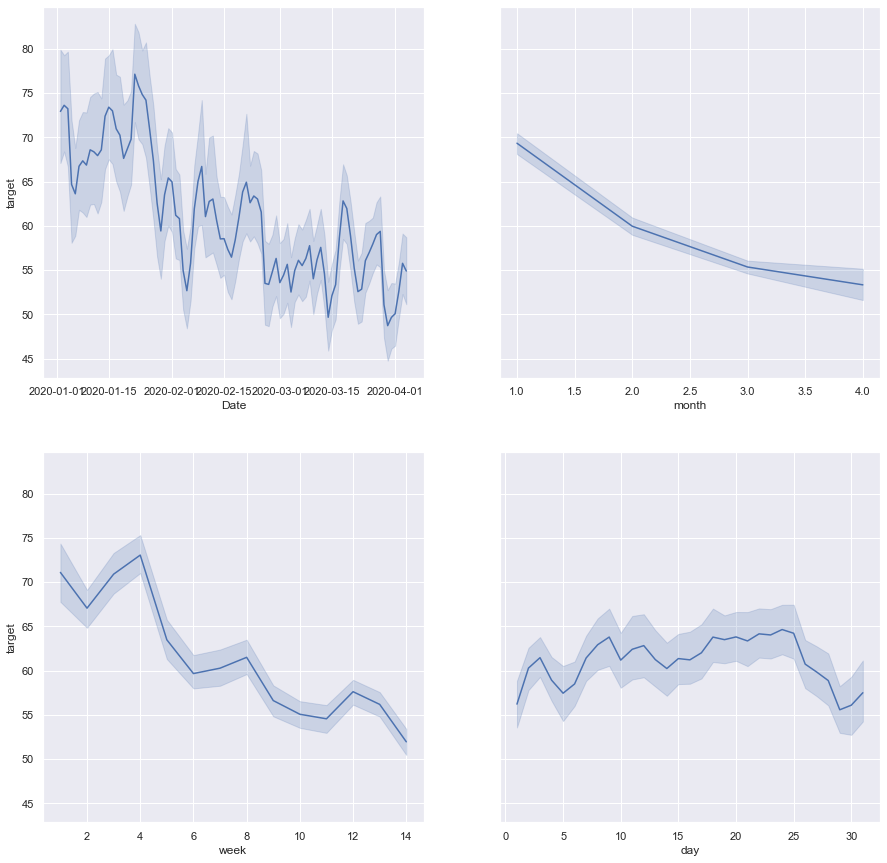

In [830]:
fig, ax = plt.subplots(2,2, sharey = True, figsize=(15,15))
sns.lineplot(x="Date", y="target", data=train, ax=ax[0,0])
sns.lineplot(x="month", y="target", data=train, ax=ax[0,1])
sns.lineplot(x="week", y="target", data=train, ax=ax[1,0])
sns.lineplot(x="day", y="target", data=train, ax=ax[1,1])

**Overall, decreasing concentration of PM2.5 over the months, cylical patterns observable**

## Testing correlations of variables

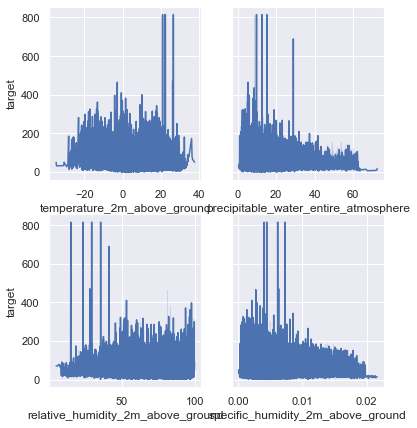

In [735]:
fig, ax = plt.subplots(2,2, sharey=True, figsize=(6,7))
sns.lineplot(x="temperature_2m_above_ground", y="target", data=train, ax=ax[0,0])
sns.lineplot(x="precipitable_water_entire_atmosphere", y="target",data=train, ax=ax[0,1])
sns.lineplot(x="relative_humidity_2m_above_ground", y="target", data=train, ax=ax[1,0])
sns.lineplot(x="specific_humidity_2m_above_ground", y="target", data=train, ax=ax[1,1])

**The outliers with very high PM2.5 concentrations seem to be in areas of high temperature, low precipitation and humidity. Possibly dry, arid climates. Though air quality with other pollutants should also be observed** 

**There are many variables in this dataset. There can be covariances as well as noise created distracting us from the real patterns so we are choosing to do PCA**

In [801]:
correlation = train.corr()
corr_target = correlation["target"]
corr_features = corr_target[corr_target>=0.1]
corr_features = pd.DataFrame(corr_features)
corr_features

,target
target,1.000000
L3_NO2_NO2_column_number_density,0.295235
L3_NO2_NO2_slant_column_number_density,0.303845
L3_NO2_tropospheric_NO2_column_number_density,0.252196
L3_CO_CO_column_number_density,0.341727
L3_HCHO_HCHO_slant_column_number_density,0.285927
L3_HCHO_tropospheric_HCHO_column_number_density,0.309343
L3_CLOUD_cloud_top_pressure,0.122033
L3_SO2_absorbing_aerosol_index,0.136017


In [802]:
corr_df = train[["L3_NO2_NO2_column_number_density","L3_NO2_NO2_slant_column_number_density", "L3_NO2_tropospheric_NO2_column_number_density",
                 "L3_CO_CO_column_number_density", "L3_HCHO_HCHO_slant_column_number_density", "L3_HCHO_tropospheric_HCHO_column_number_density",
                "L3_CLOUD_cloud_top_pressure", "L3_SO2_absorbing_aerosol_index"]].corr()

corr_df

,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_top_pressure,L3_SO2_absorbing_aerosol_index
L3_NO2_NO2_column_number_density,1.000000,0.809811,0.780863,0.208435,0.094703,0.117040,-0.013958,-0.010084
L3_NO2_NO2_slant_column_number_density,0.809811,1.000000,0.811885,0.220781,0.096055,0.087813,0.150003,0.055887
L3_NO2_tropospheric_NO2_column_number_density,0.780863,0.811885,1.000000,0.215477,0.114674,0.132466,-0.002271,-0.014463
L3_CO_CO_column_number_density,0.208435,0.220781,0.215477,1.000000,0.310696,0.261246,0.188829,0.005429
L3_HCHO_HCHO_slant_column_number_density,0.094703,0.096055,0.114674,0.310696,1.000000,0.894417,0.052480,0.138075
L3_HCHO_tropospheric_HCHO_column_number_density,0.117040,0.087813,0.132466,0.261246,0.894417,1.000000,-0.035622,0.112475
L3_CLOUD_cloud_top_pressure,-0.013958,0.150003,-0.002271,0.188829,0.052480,-0.035622,1.000000,0.057613
L3_SO2_absorbing_aerosol_index,-0.010084,0.055887,-0.014463,0.005429,0.138075,0.112475,0.057613,1.000000


## Multicolinearity

- NO2 column number density, NO2 slant column density and NO2 tropospheric column density are all correlated with one another out of the 3 NO2 slant column density is most strongly correlated to the target variable
- HCHO slant column density and HCHO tropospheric column density are strongly correlated with one another but the tropospheric column density is more strongly correlated with the target variable

- Important variables based on correlation is **L3_NO2_NO2_slant_column_density, L3_CO_CO_column_number_density, L3_HCHO_tropospheric_HCHO_column_number_density, L3_CLOUD_cloud_top_pressure, and L3_SO2_absorbing_aerosol_index**

In [803]:
target_var = train["target"]
ind_var = train.drop("target", axis=1)

In [804]:
ind_var = ind_var.drop("Date", axis=1)

In [805]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(ind_var, target_var)
important_features = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), ind_var.columns), 
             reverse=True)[:20]
important_features = pd.DataFrame(important_features)

In [806]:
print("Top 20 features sorted by their score:")
important_features

Top 20 features sorted by their score:


,0,1
0,0.1624,L3_CO_CO_column_number_density
1,0.0845,L3_AER_AI_sensor_altitude
2,0.0731,L3_NO2_NO2_slant_column_number_density
3,0.0488,L3_HCHO_tropospheric_HCHO_column_number_density
4,0.0363,temperature_2m_above_ground
5,0.0345,v_component_of_wind_10m_above_ground
6,0.0345,u_component_of_wind_10m_above_ground
7,0.0327,specific_humidity_2m_above_ground
8,0.0236,L3_CLOUD_surface_albedo
9,0.0189,L3_O3_O3_column_number_density


# Final Features Selected 

- Based on checking strong correlations of target variable to features and multicolinearity among these features. 
- Using feature importance to select the top 20 features 
- Then combining features from these two analysis

In [807]:
features = ["L3_NO2_NO2_slant_column_number_density","L3_CO_CO_column_number_density","L3_HCHO_tropospheric_HCHO_column_number_density",
                "L3_CLOUD_cloud_top_pressure", "L3_SO2_absorbing_aerosol_index", "L3_AER_AI_sensor_altitude", 
                    "temperature_2m_above_ground", "u_component_of_wind_10m_above_ground", "v_component_of_wind_10m_above_ground",
                    "specific_humidity_2m_above_ground", "L3_CLOUD_surface_albedo", "relative_humidity_2m_above_ground", 
                    "L3_CLOUD_cloud_optical_depth", "L3_O3_O3_effective_temperature", "L3_O3_O3_column_number_density", "L3_AER_AI_absorbing_aerosol_index", 
                    "precipitable_water_entire_atmosphere", "L3_NO2_sensor_altitude", "L3_NO2_tropopause_pressure", "week"]

In [808]:
x = pd.DataFrame(train, columns = features)

In [809]:
x.head(2)

,L3_NO2_NO2_slant_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_top_pressure,L3_SO2_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,specific_humidity_2m_above_ground,L3_CLOUD_surface_albedo,relative_humidity_2m_above_ground,L3_CLOUD_cloud_optical_depth,L3_O3_O3_effective_temperature,L3_O3_O3_column_number_density,L3_AER_AI_absorbing_aerosol_index,precipitable_water_entire_atmosphere,L3_NO2_sensor_altitude,L3_NO2_tropopause_pressure,week
0,0.000156,0.021080,0.000064,70799.498221,-1.861476,840209.874619,18.516840,1.996377,-1.227395,0.00804,0.226843,60.200001,18.201564,234.151102,0.119095,-1.231330,11.0,840209.874619,6156.074219,1
1,0.000197,0.022017,0.000171,99353.672374,-1.452612,840772.941995,22.546533,3.330430,-1.188108,0.00839,0.315403,48.799999,5.958538,233.313706,0.115179,-1.082553,14.6,840772.941995,6156.074219,1


In [810]:
x.shape

(30557, 20)

# Modeling

## Scaling 

In [811]:
from sklearn.preprocessing import StandardScaler 

X_scaled = StandardScaler().fit_transform(x)
X = pd.DataFrame(X_scaled, columns=x.columns)

In [812]:
X.head(3)

,L3_NO2_NO2_slant_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_top_pressure,L3_SO2_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,specific_humidity_2m_above_ground,L3_CLOUD_surface_albedo,relative_humidity_2m_above_ground,L3_CLOUD_cloud_optical_depth,L3_O3_O3_effective_temperature,L3_O3_O3_column_number_density,L3_AER_AI_absorbing_aerosol_index,precipitable_water_entire_atmosphere,L3_NO2_sensor_altitude,L3_NO2_tropopause_pressure,week
0,-0.072243,-1.531354,-0.295651,0.000000,0.134489,2.625133,0.984205,0.583280,-0.498085,0.537511,1.032699e-14,-0.550456,1.838395e-15,0.357894,-0.673000,-0.130665,-0.402523,0.363649,-1.062255,-1.706791
1,0.320307,-1.436701,1.013984,1.575274,0.796645,2.818198,1.415508,1.075924,-0.483214,0.629929,8.905507e-01,-1.156595,-5.279419e-01,0.332618,-0.801950,0.146586,-0.065709,0.366077,-1.062255,-1.706791
2,0.067364,-1.572142,0.438194,1.372130,0.601757,3.036878,1.895489,1.716741,1.291532,0.394925,8.107091e-01,-1.975414,-5.366861e-01,0.300013,-0.778995,0.298113,0.102698,0.368827,-0.891414,-1.706791


## Cross Validation with Different Models

In [813]:
from math import sqrt
from sklearn import metrics
from sklearn.metrics import SCORERS

In [814]:
from sklearn.model_selection import cross_validate 

def evaluate_model(estimator):
    cv_results = cross_validate(estimator,
                    X=X,
                    y=target_var,
                    scoring= "neg_mean_squared_error",
                          n_jobs=-1, cv=5,
                     return_train_score=True)
    return np.round(np.sqrt(pd.DataFrame(cv_results).abs().mean()),2).to_dict()

In [815]:
RESULTS = {}

### Basic Linear Models

In [816]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.tree import DecisionTreeRegressor

In [817]:
lr  = LinearRegression()
dtree   = DecisionTreeRegressor()
elastic = ElasticNet()
lasso   = Lasso()
ridge   = Ridge()

In [818]:
RESULTS["linear reg"] = evaluate_model(lr)
RESULTS["tree"] = evaluate_model(dtree)
RESULTS["elasticnet"] = evaluate_model(elastic)
RESULTS["lasso"] = evaluate_model(lasso)
RESULTS["ridge"] = evaluate_model(ridge)

pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
linear reg,0.36,0.06,39.09,38.27
tree,1.31,0.08,50.62,0.00
elasticnet,0.24,0.05,39.72,39.30
lasso,0.28,0.05,39.13,38.50
ridge,0.24,0.05,39.09,38.27


**We can see from the RMSE scores that the error for all of these models are rather big.**

### Ensemble Models

In [819]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor 

In [820]:
bagging_10 = BaggingRegressor(n_estimators=10)
RESULTS["bagging_10"] = evaluate_model(bagging_10)

In [821]:
bagging_100 = BaggingRegressor(n_estimators=100)
RESULTS["bagging_100"] = evaluate_model(bagging_100)

In [822]:
randomforest = RandomForestRegressor(n_estimators=100)
RESULTS["randomforest"] = evaluate_model(randomforest)

In [823]:
pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
linear reg,0.36,0.06,39.09,38.27
tree,1.31,0.08,50.62,0.00
elasticnet,0.24,0.05,39.72,39.30
lasso,0.28,0.05,39.13,38.50
ridge,0.24,0.05,39.09,38.27
bagging_10,3.51,0.23,35.25,13.18
bagging_100,11.61,0.76,33.89,11.04
randomforest,8.53,0.48,33.89,11.02


**We can see that the RMSE decreased so these models are better than the basic linear models**

In [824]:
import xgboost

In [825]:
from xgboost import XGBRegressor

In [826]:
xg_500 = XGBRegressor(n_estimators=500)
RESULTS['xgboost_500'] = evaluate_model(xg_500)

In [827]:
from lightgbm import LGBMRegressor

In [828]:
lgb = LGBMRegressor(n_estimators=500, max_depth=-1)
RESULTS["lightgbm_500"] = evaluate_model(lgb)

In [829]:
pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
linear reg,0.36,0.06,39.09,38.27
tree,1.31,0.08,50.62,0.00
elasticnet,0.24,0.05,39.72,39.30
lasso,0.28,0.05,39.13,38.50
ridge,0.24,0.05,39.09,38.27
bagging_10,3.51,0.23,35.25,13.18
bagging_100,11.61,0.76,33.89,11.04
randomforest,8.53,0.48,33.89,11.02
xgboost_500,8.33,0.54,34.62,7.93
lightgbm_500,2.27,0.65,33.03,16.95


**The models which seem to yield the best rmse scores are the xgboost and lightgbm models**

# LightGBM Model

In [766]:
lgb = LGBMRegressor()

lgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [767]:
predictions = lgb.predict(X_test)

In [774]:
X = X_test.reset_index().copy() 
X["target"] = y_test.tolist()
X["prediction"] = predictions
X.tail()

,index,L3_NO2_NO2_slant_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_top_pressure,L3_SO2_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_CLOUD_surface_albedo,relative_humidity_2m_above_ground,L3_CLOUD_cloud_optical_depth,L3_O3_O3_column_number_density,temperature_2m_above_ground,L3_NO2_sensor_altitude,week,target,prediction
9163,7201,-1.166507e-14,-7.013804e-16,1.657237e-15,0.000000,-2.157611e-14,1.659539,3.931583,3.250827,1.032699e-14,-0.246627,1.838395e-15,2.193475e-14,-0.925869,5.020099e-16,-1.449592,17.0,19.223499
9164,19407,3.340712e-02,-4.247793e-01,-1.062661e-01,-0.673724,9.078163e-01,0.702036,1.114324,3.667333,7.562101e-01,0.859880,-3.264169e-01,1.590361e+00,0.008343,3.394629e-01,0.865205,25.0,22.809158
9165,19609,-1.562457e+00,-1.362986e+00,7.171975e-01,0.273379,4.879502e-01,1.364044,-0.194044,-0.444539,8.940099e-02,0.092902,-5.718024e-01,-7.271723e-01,0.839157,-3.259531e+00,1.379604,63.0,35.780773
9166,26644,4.743229e-03,-2.023505e-01,1.657237e-15,0.748280,-2.157611e-14,0.092971,-2.843174,0.236319,2.269205e+00,1.427470,3.584666e+00,1.299984e+00,-0.723940,3.318028e-01,-0.935192,34.0,33.774975
9167,59,-1.690627e-01,-1.500402e+00,1.229281e+00,-1.049326,3.317877e-01,2.545717,0.060963,-0.724834,-1.652973e-01,-1.523468,-6.079811e-01,-6.786866e-01,1.280540,3.626499e-01,0.350806,44.0,43.973038


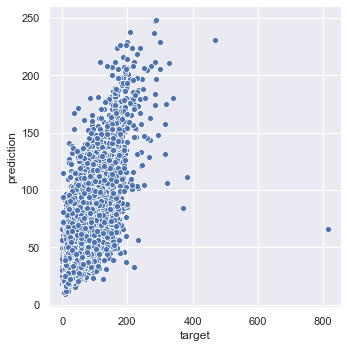

In [769]:
sns.relplot(x="target", y="prediction", data=X, kind="scatter")

# XGBoost Model

In [770]:
model2 = XGBRegressor()
model2.fit(X=X_train, y=y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [771]:
prediction2 = model2.predict(X_test)

In [781]:
X = X_test.reset_index().copy() 
X["target"] = y_test.tolist()
X["prediction"] = prediction2
X.tail()

,index,L3_NO2_NO2_slant_column_number_density,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_CLOUD_cloud_top_pressure,L3_SO2_absorbing_aerosol_index,L3_AER_AI_sensor_altitude,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_CLOUD_surface_albedo,relative_humidity_2m_above_ground,L3_CLOUD_cloud_optical_depth,L3_O3_O3_column_number_density,temperature_2m_above_ground,L3_NO2_sensor_altitude,week,target,prediction
9163,7201,-1.166507e-14,-7.013804e-16,1.657237e-15,0.000000,-2.157611e-14,1.659539,3.931583,3.250827,1.032699e-14,-0.246627,1.838395e-15,2.193475e-14,-0.925869,5.020099e-16,-1.449592,17.0,15.180000
9164,19407,3.340712e-02,-4.247793e-01,-1.062661e-01,-0.673724,9.078163e-01,0.702036,1.114324,3.667333,7.562101e-01,0.859880,-3.264169e-01,1.590361e+00,0.008343,3.394629e-01,0.865205,25.0,24.650000
9165,19609,-1.562457e+00,-1.362986e+00,7.171975e-01,0.273379,4.879502e-01,1.364044,-0.194044,-0.444539,8.940099e-02,0.092902,-5.718024e-01,-7.271723e-01,0.839157,-3.259531e+00,1.379604,63.0,40.020000
9166,26644,4.743229e-03,-2.023505e-01,1.657237e-15,0.748280,-2.157611e-14,0.092971,-2.843174,0.236319,2.269205e+00,1.427470,3.584666e+00,1.299984e+00,-0.723940,3.318028e-01,-0.935192,34.0,47.230000
9167,59,-1.690627e-01,-1.500402e+00,1.229281e+00,-1.049326,3.317877e-01,2.545717,0.060963,-0.724834,-1.652973e-01,-1.523468,-6.079811e-01,-6.786866e-01,1.280540,3.626499e-01,0.350806,44.0,41.900002


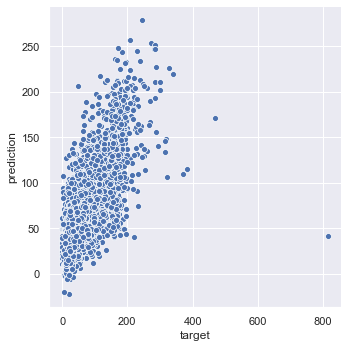

In [773]:
sns.relplot(x="target", y="prediction", data=X, kind="scatter")